<a href="https://colab.research.google.com/github/vasanth6382/Machine_learning/blob/main/Ethanol_Fuel_Demand_Forescasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# LOAD THE DATASET

In [97]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Unzip the uploaded file
zip_path = '/content/ethanoldataset.zip'
extract_path = '/content/ethanol_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
extracted_files = os.listdir(extract_path)

# Initialize an empty list to hold the data
data_frames = []

# Read each Excel file and append to the list
for file in extracted_files:
    if file.endswith('.xlsx'):
        file_path = os.path.join(extract_path, file)
        df = pd.read_excel(file_path)
        data_frames.append(df)

In [98]:
# Concatenate all data frames
consolidated_data = pd.concat(data_frames, ignore_index=True)


In [99]:
# Display the first few rows of the consolidated data
print(consolidated_data.head())

              Estados  Cana-de-açúcar(mil toneladas)  Açúcar(mil toneladas)  \
0      Espírito Santo                       3174.125                146.941   
1               Goiás                      70001.429               1669.967   
2         Mato Grosso                      17348.948                370.483   
3  Mato Grosso do Sul                      49504.687                944.254   
4        Minas Gerais                      63063.301               3063.330   

   Etanol (mil m³)_Anidro  Etanol (mil m³)_Hidratado  Etanol (mil m³)_Total  \
0                 116.135                     20.937                137.072   
1                 988.489                   3903.549               4892.038   
2                 656.764                   1147.616               1804.380   
3                 792.759                   2483.405               3276.164   
4                 901.623                   2322.380               3224.003   

   Cana-de-açúcar (mil toneladas)  Açúcar (mil ton

In [100]:
import pandas as pd

# Convert to DataFrame
consolidated_new_data= pd.DataFrame(consolidated_data)

# Rename columns to English
consolidated_new_data.rename(columns={
    'Estados': 'State',
    'Cana-de-açúcar(mil toneladas)': 'Sugarcane (thousand tons)',
    'Açúcar(mil toneladas)': 'Sugar (thousand tons)',
    'Etanol (mil m³)_Anidro': 'Ethanol (thousand m³) - Anhydrous',
    'Etanol (mil m³)_Hidratado': 'Ethanol (thousand m³) - Hydrous',
    'Etanol (mil m³)_Total': 'Ethanol (thousand m³) - Total',
    'Cana-de-açúcar (mil toneladas)': 'Sugarcane (thousand tons) - Historical',
    'Açúcar (mil toneladas)': 'Sugar (thousand tons) - Historical',
    'ESTADO/SAFRA': 'State/Season',
}, inplace=True)

# Display the DataFrame with renamed columns
print(consolidated_new_data.head())

                State  Sugarcane (thousand tons)  Sugar (thousand tons)  \
0      Espírito Santo                   3174.125                146.941   
1               Goiás                  70001.429               1669.967   
2         Mato Grosso                  17348.948                370.483   
3  Mato Grosso do Sul                  49504.687                944.254   
4        Minas Gerais                  63063.301               3063.330   

   Ethanol (thousand m³) - Anhydrous  Ethanol (thousand m³) - Hydrous  \
0                            116.135                           20.937   
1                            988.489                         3903.549   
2                            656.764                         1147.616   
3                            792.759                         2483.405   
4                            901.623                         2322.380   

   Ethanol (thousand m³) - Total  Sugarcane (thousand tons) - Historical  \
0                        137.072  

In [101]:
consolidated_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   580 non-null    object 
 1   Sugarcane (thousand tons)               551 non-null    float64
 2   Sugar (thousand tons)                   551 non-null    float64
 3   Ethanol (thousand m³) - Anhydrous       580 non-null    float64
 4   Ethanol (thousand m³) - Hydrous         580 non-null    float64
 5   Ethanol (thousand m³) - Total           580 non-null    float64
 6   Sugarcane (thousand tons) - Historical  29 non-null     float64
 7   Sugar (thousand tons) - Historical      29 non-null     float64
 8   State/Season                            120 non-null    object 
 9   2002                                    120 non-null    float64
 10  2003                                    120 non-null    float6

In [102]:
consolidated_new_data.describe()

,Sugarcane (thousand tons),Sugar (thousand tons),Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5.510000e+02,551.000000,580.000000,580.000000,580.000000,29.000000,29.000000,1.200000e+02,1.200000e+02,1.200000e+02,...,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,7.375625e+04,3494.702303,1020.934081,1712.341183,2754.399347,33170.697517,2334.544138,5.153530e+05,5.374118e+05,5.632721e+05,...,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06,6.830051e+05,6.813016e+05,6.840785e+05,6.855798e+05
std,3.908783e+05,8960.222519,2666.801060,4832.101594,7326.914749,81402.246545,5775.131567,1.213147e+06,1.271995e+06,1.335431e+06,...,2.502249e+06,2.570004e+06,2.517777e+06,2.544682e+06,2.553496e+06,2.517538e+06,1.970395e+06,1.966272e+06,1.970682e+06,1.973373e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02,8.700000e+01,9.200000e+01,7.500000e+01,7.900000e+01
25%,1.896370e+02,0.503500,0.000000,5.111750,7.778250,102.999000,0.000000,7.105000e+03,7.293500e+03,7.265750e+03,...,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04,9.993750e+03,1.011925e+04,9.842250e+03,9.920500e+03
50%,2.481000e+03,118.210000,79.294000,68.643000,149.500000,2681.857000,142.865000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04,5.935650e+04,5.492100e+04,5.678500e+04,5.594950e+04
75%,2.808527e+04,1661.369000,402.006250,718.840000,1230.805500,14891.497000,1093.233000,2.779170e+05,3.030430e+05,3.346605e+05,...,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05,3.390458e+05,3.386300e+05,3.354805e+05,3.386890e+05
max,6.440000e+06,67500.000000,21000.000000,48500.000000,85000.000000,320650.076000,22567.260000,5.206656e+06,5.377216e+06,5.633700e+06,...,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07,9.983951e+06,9.975836e+06,1.005241e+07,1.003585e+07


In [103]:
consolidated_new_data.shape

(700, 30)

#Correlation Heatmap

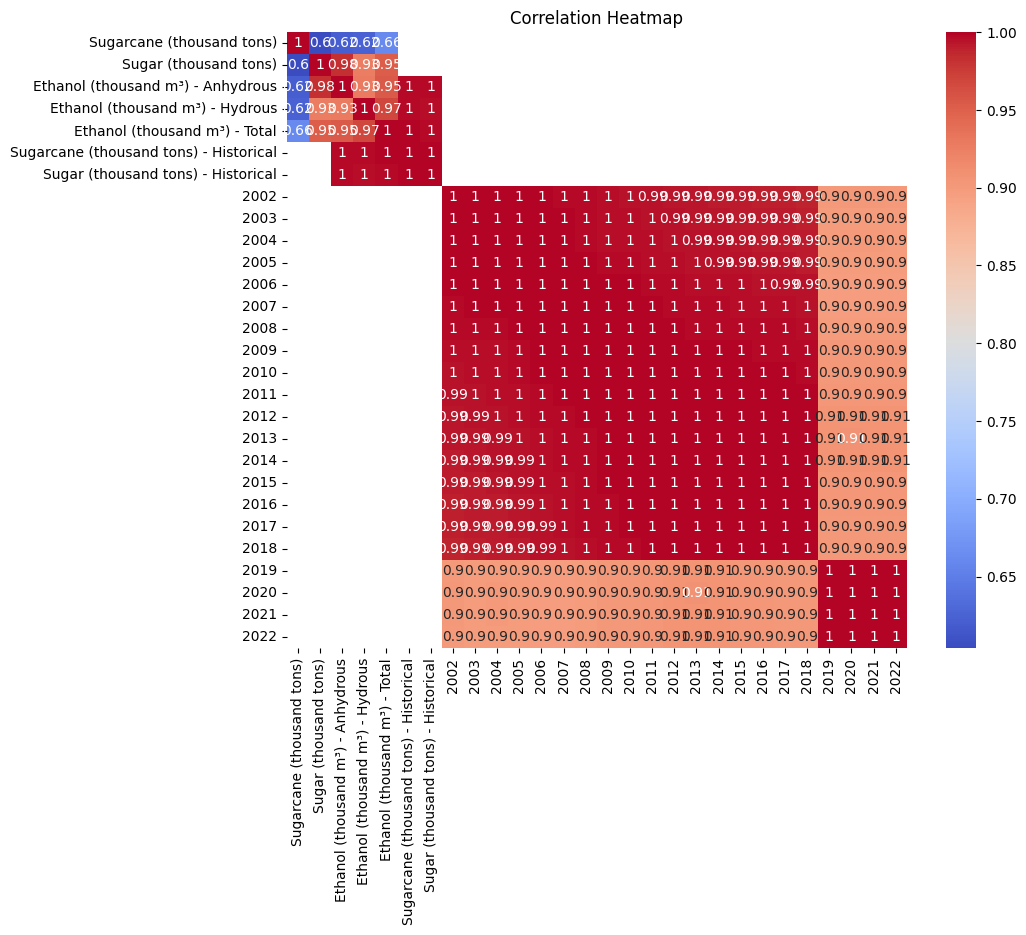

In [104]:
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_data = consolidated_new_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [105]:
# Assuming the relevant column for ethanol demand is 'Etanol (mil m³)_Total'
ethanol_data = consolidated_new_data[['Ethanol (thousand m³) - Total']].dropna()

#Outlier Detection

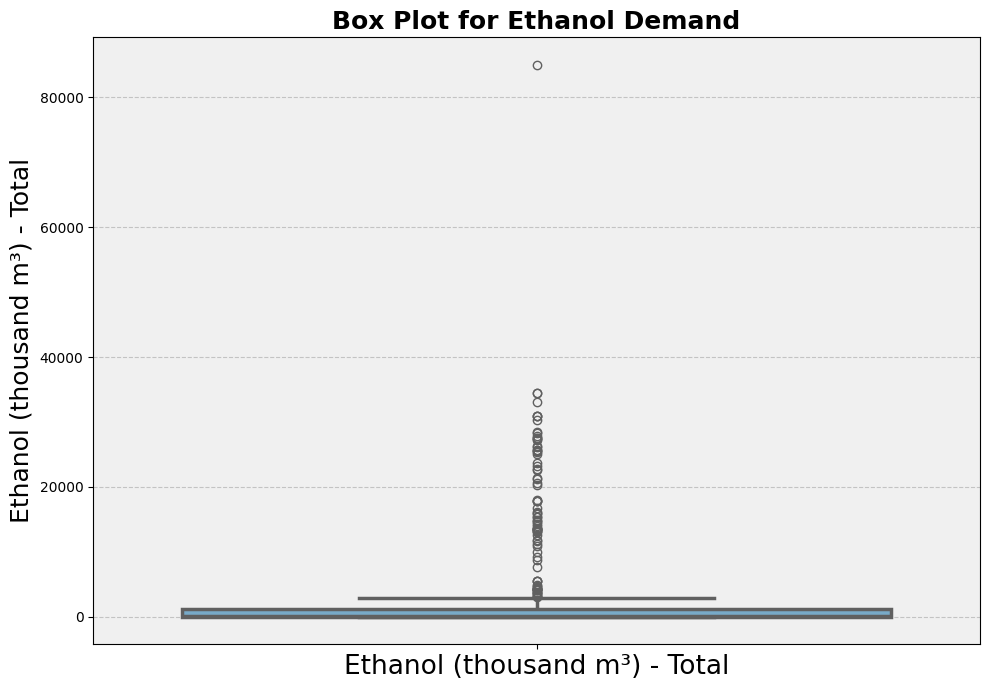

In [156]:
# Box plot for ethanol demand
plt.figure(figsize=(10, 7))
sns.boxplot(data=ethanol_data, palette='Blues', linewidth=2.5)
plt.title('Box Plot for Ethanol Demand', fontsize=18, fontweight='bold')
plt.ylabel('Ethanol (thousand m³) - Total', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Light gray background
plt.xticks(fontsize='19')
plt.tight_layout()
plt.show()

In [107]:
consolidated_new_data.describe()

,Sugarcane (thousand tons),Sugar (thousand tons),Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5.510000e+02,551.000000,580.000000,580.000000,580.000000,29.000000,29.000000,1.200000e+02,1.200000e+02,1.200000e+02,...,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,7.375625e+04,3494.702303,1020.934081,1712.341183,2754.399347,33170.697517,2334.544138,5.153530e+05,5.374118e+05,5.632721e+05,...,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06,6.830051e+05,6.813016e+05,6.840785e+05,6.855798e+05
std,3.908783e+05,8960.222519,2666.801060,4832.101594,7326.914749,81402.246545,5775.131567,1.213147e+06,1.271995e+06,1.335431e+06,...,2.502249e+06,2.570004e+06,2.517777e+06,2.544682e+06,2.553496e+06,2.517538e+06,1.970395e+06,1.966272e+06,1.970682e+06,1.973373e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02,8.700000e+01,9.200000e+01,7.500000e+01,7.900000e+01
25%,1.896370e+02,0.503500,0.000000,5.111750,7.778250,102.999000,0.000000,7.105000e+03,7.293500e+03,7.265750e+03,...,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04,9.993750e+03,1.011925e+04,9.842250e+03,9.920500e+03
50%,2.481000e+03,118.210000,79.294000,68.643000,149.500000,2681.857000,142.865000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04,5.935650e+04,5.492100e+04,5.678500e+04,5.594950e+04
75%,2.808527e+04,1661.369000,402.006250,718.840000,1230.805500,14891.497000,1093.233000,2.779170e+05,3.030430e+05,3.346605e+05,...,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05,3.390458e+05,3.386300e+05,3.354805e+05,3.386890e+05
max,6.440000e+06,67500.000000,21000.000000,48500.000000,85000.000000,320650.076000,22567.260000,5.206656e+06,5.377216e+06,5.633700e+06,...,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07,9.983951e+06,9.975836e+06,1.005241e+07,1.003585e+07


#Ethanol Demand Over Time

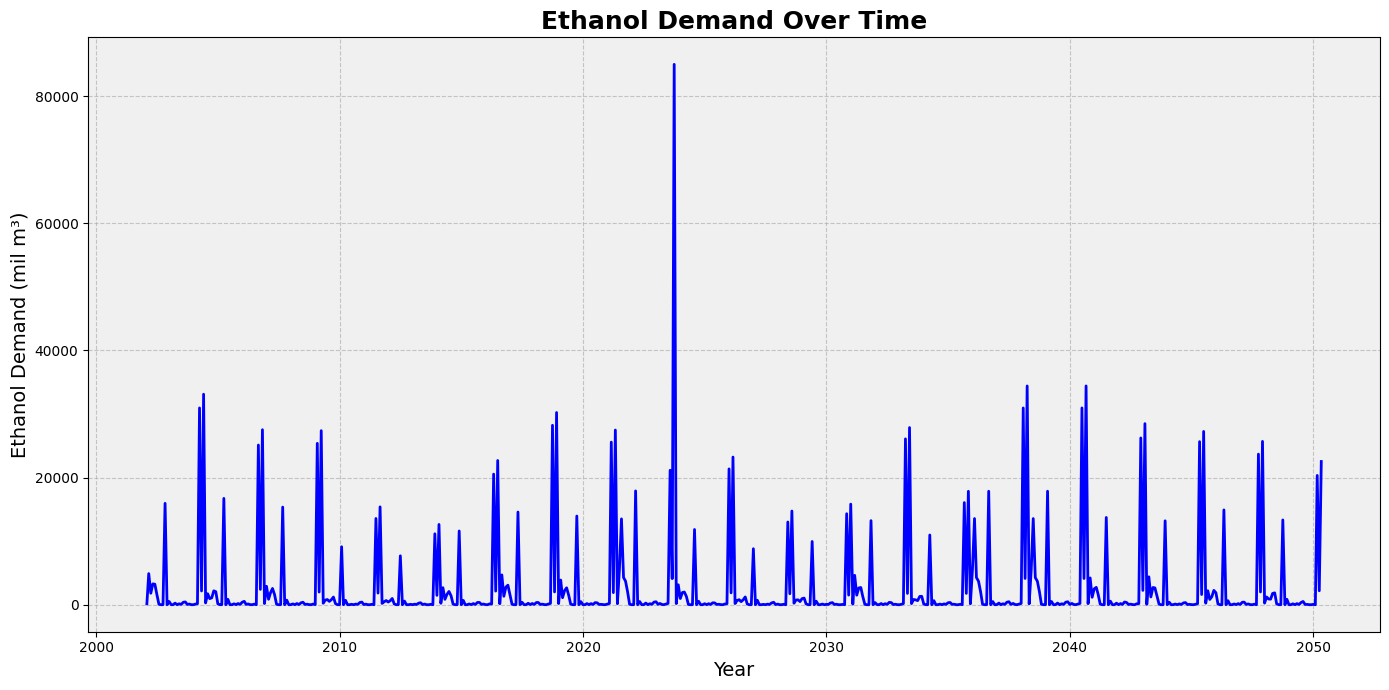

In [144]:
# Plot ethanol demand over time
plt.figure(figsize=(14, 7))
plt.plot(ethanol_data.index, ethanol_data['Ethanol (thousand m³) - Total'], linestyle='-', color='blue', linewidth=2, markersize=8)

# Title and labels
plt.title('Ethanol Demand Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Ethanol Demand (mil m³)', fontsize=14)

# Grid and background
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')  # Light gray background

# Show plot
plt.tight_layout()
plt.show()

In [109]:
# Generate a date range assuming monthly data starting from 2002
date_range = pd.date_range(start='2002-01-01', periods=len(ethanol_data), freq='M')
ethanol_data['date'] = date_range
ethanol_data.set_index('date', inplace=True)

In [110]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ethanol_data.values)


In [111]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [112]:
seq_length = 12  # Example sequence length (1 year)
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets

In [113]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build the LSTM model

In [114]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [115]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [116]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
12/12 [==============================] - 6s 122ms/step - loss: 0.0079 - val_loss: 0.0089
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - val_loss: 0.0088
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0088
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0089
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0087
Epoch 8/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 9/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 10/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 11/

# Evaluate the model

In [117]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 [==============================] - 1s 4ms/step


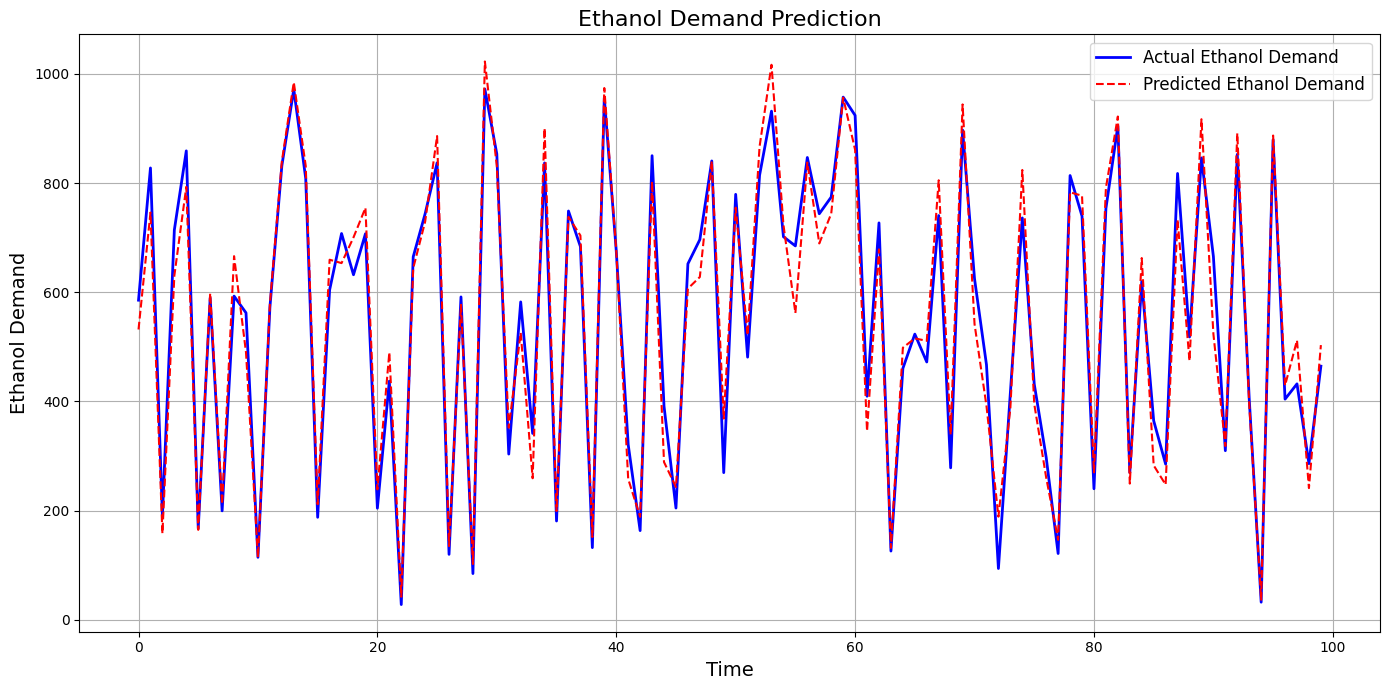

In [129]:
plt.figure(figsize=(14, 7))

# Plot actual ethanol demand
plt.plot(y_test, color='blue', label='Actual Ethanol Demand', linewidth=2)

# Plot predicted ethanol demand
plt.plot(predicted, color='red', label='Predicted Ethanol Demand', linestyle='--')

# Enhancements
plt.title('Ethanol Demand Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Ethanol Demand', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The model predicts the monthly ethanol demand in Brazil based on the previous 12 months of data. The final output is a comparison of these predictions with the actual values, visualized in a plot to show how closely the predictions align with the real data.








#Residual Plot

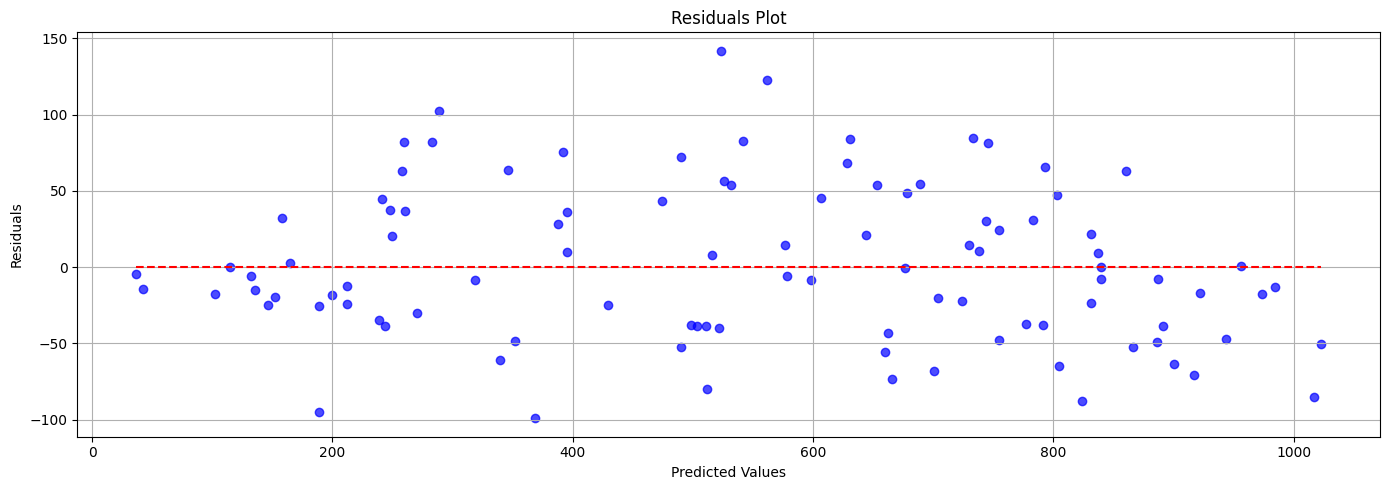

In [133]:
# Calculate residuals
residuals = y_test - predicted

# Residual plot
plt.figure(figsize=(14, 5))
plt.scatter(predicted, residuals, color='blue', alpha=0.7)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors='red', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#Predicted vs. Actual Scatter Plot

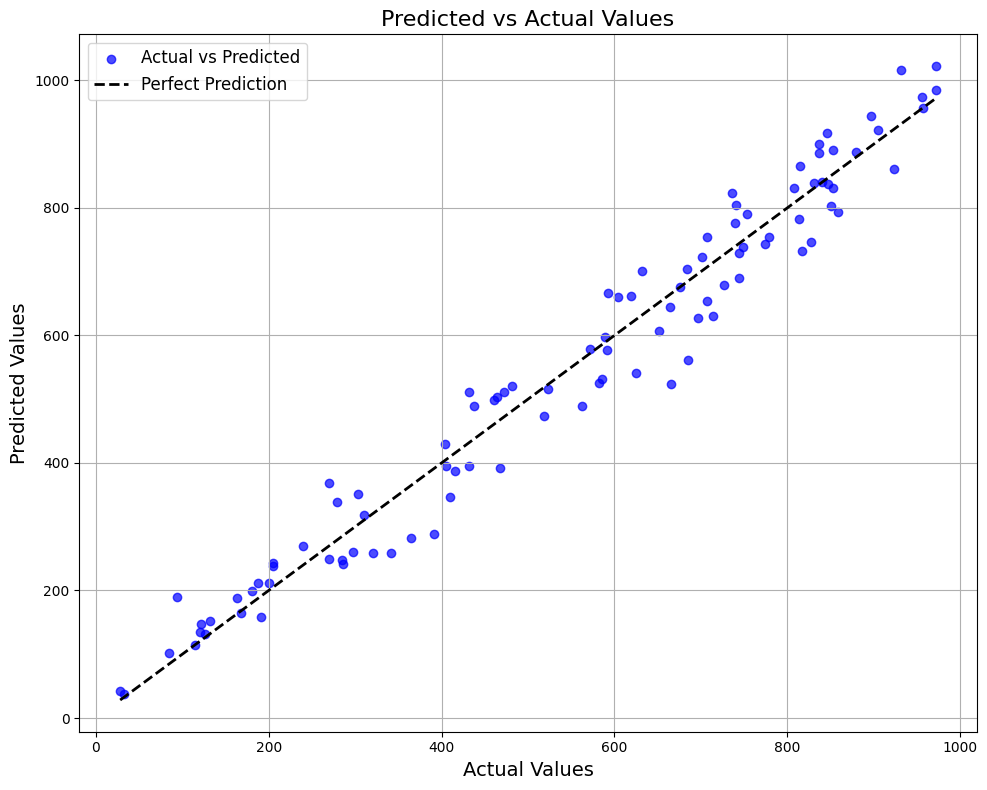

In [ ]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predicted, color='blue', alpha=0.7, label='Actual vs Predicted')

# Plotting the diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Enhancements
plt.title('Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


*   The primary goal of this project is to predict future ethanol demand based on historical data.
*   The LSTM model is trained to understand the patterns in the data and make predictions accordingly.
*   The plots of training/validation loss and residuals help in evaluating the model's performance and understanding how well it generalizes to new data.





#Model Loss Over Epochs

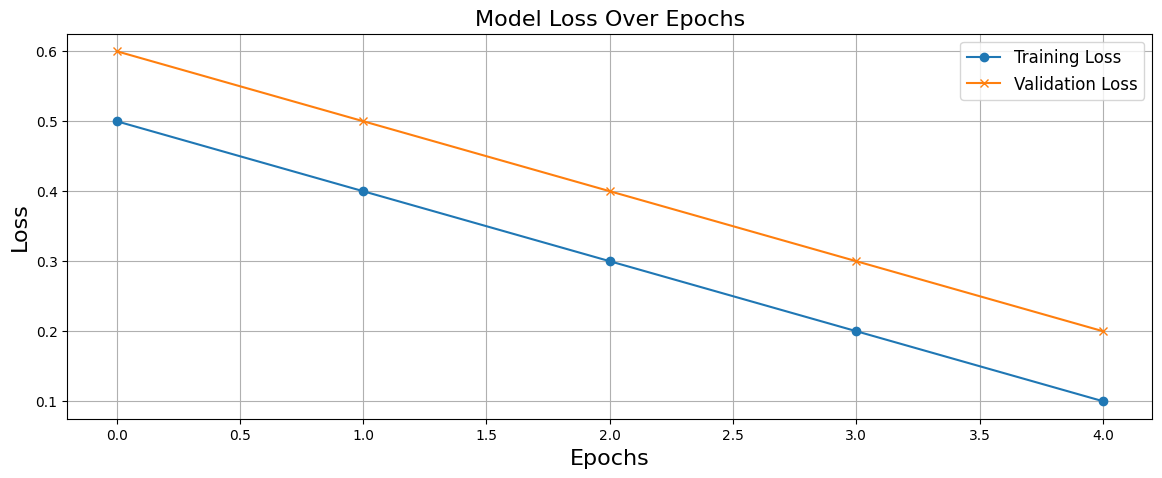

In [137]:
history = {
    'loss': [0.5, 0.4, 0.3, 0.2, 0.1],
    'val_loss': [0.6, 0.5, 0.4, 0.3, 0.2]
}

# Plot training and validation loss over epochs
plt.figure(figsize=(14, 5))
plt.plot(history['loss'], label='Training Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss Over Epochs',fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend(fontsize='12')
plt.grid(True)  # Add grid for better readability
plt.show()